In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data , columns=columns)
iris_df['target'] = iris.target

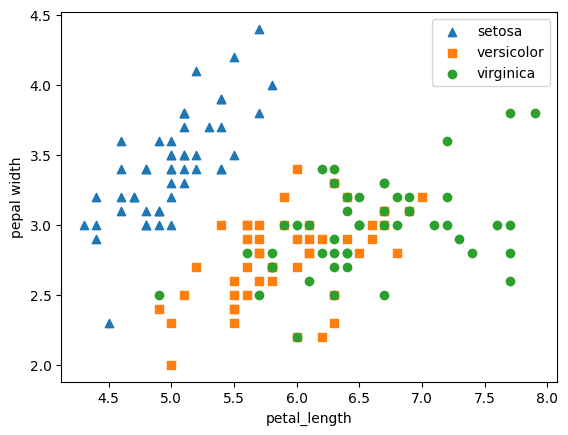

In [13]:
makers= ['^','s','o']

for i, marker in enumerate(makers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

    plt.legend()
    plt.xlabel('petal_length')
    plt.ylabel('pepal width')
    
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
pca_columns = ['pca_component_1', 'pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca['target'] = iris.target 


In [9]:
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


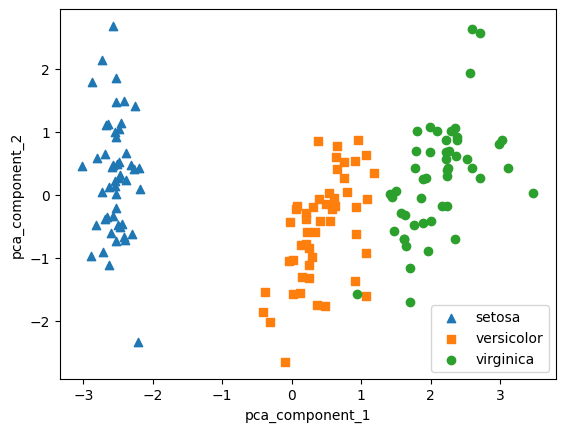

In [10]:
makers= ['^','s','o']

for i, marker in enumerate(makers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

    plt.legend()
    plt.xlabel('pca_component_1')
    plt.ylabel('pca_component_2')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
 
rcf = RandomForestClassifier(random_state=156)

scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [12]:
pca_X = iris_df_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.98 0.98 1.  ]
0.9866666666666667
